objection detection project using mobile net

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [4]:
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classlabels=[]
file_name='labels.txt'
with open(file_name,'rt')as fpt:
    classlabels=fpt.read().rstrip('\n').split('\n')

In [7]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
len(classlabels)

80

In [9]:
model.setInputSize(320,320)           #size of new frame
model.setInputScale(1.0/127.5)        #scale factor of frame
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001B823E123D0>

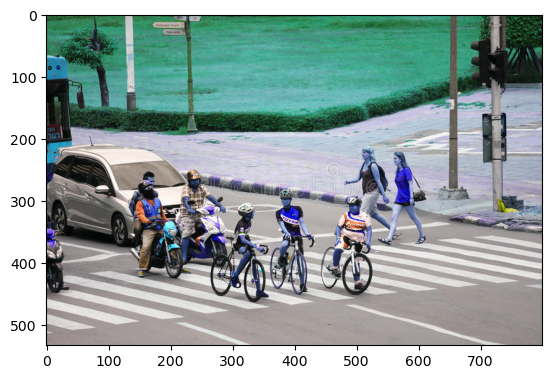

In [10]:
img = cv2.imread('boy.jpg')
plt.imshow(img)

In [11]:
classindex , confidece, bbox=model.detect(img,confThreshold=0.5)

In [12]:
classindex

array([3, 2, 1, 2, 2, 8, 2])

In [13]:
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN

for classind,conf,boxes in zip(classindex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[classind-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0) , thickness=3)

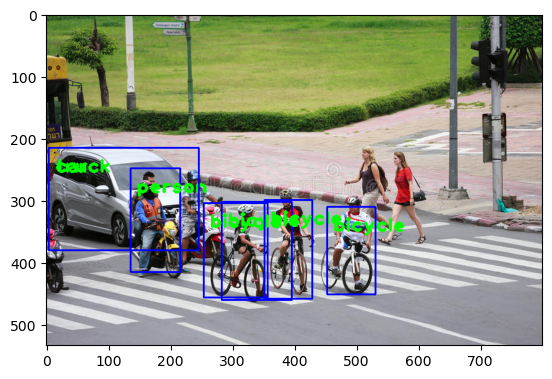

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [15]:
#for video



cap = cv2.VideoCapture('video_testing_2.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    
if not cap.isOpened():
    raise ValueError('Can\'t open the video')

font_scale = 1
font = cv2.FONT_HERSHEY_COMPLEX_SMALL

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.6)
    
    print(ClassIndex)
    
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255,0,0), 2)
                cv2.putText(frame, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+48), font, fontScale=font_scale, color=(0,255,0), thickness=1)
    
    cv2.imshow("object detection project 1", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[4 1]
[4 1]
[4 1]
[4 1 1 3]
[1 4 3]
[1 1 4 2]
[1 2 4 8]
[4 1 1 2 8]
[2 1 1 4 3]
[3 1 1 4]
[3 4 1 4]
[4 3 1 1]
[4 1 3 4]
[3 3 1 1]
[1 4 3 3 1]
[4 1 4 3 1]
[4 3 1 1 4]
[4 3 1 1 4]
[4 1 3 1 3]
[4 1 3 1 3]
[4 3 1 1]
[4 1 1 3 6 4]
[1 4 4 1 3 6]
[1 4 4 1 1 6]
[4 3 3 4 6 1 1]
[4 4 4 1 3 4 1 3]
[4 3 8 1 3]
[1 3]
[1 3 3 3 3 3]
[1 3 3 3]
[3 1]
[1 3]
[1 3 3]
[3 3 1 3 3]
[3 3 1 3 3]
[3 1 3 4 3 4]
[1 3 3 3]
[4 1]
[4 1 1 1]
[1 4 1]
[1 4 4 1 3]
[1 4 1]
[4 1 1]
[1 1]
[1 3 1]
[1 4 3 1]
[1 1 3]
[1 1 4]
[1 3 1]
[1]
[1]
[1]
[4 1 3]
[3]
[3 4 1]
[3 4 1]
[3 1 4]
[3 4 1 1]
[3 1 4]
[3 1 6]
[3 4 1 1]
[3 1 6]
[3 1]
[3 1 6 1]
[3 4 1 1 6]
[3 6 1 1 4]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1 1]
[3 1 1 2 4]
[3 1 2 1]
[3 1 1]
[3 1]
[3 1 4]
[3 4 1 4]
[3 1 4]
[1 1 4]
[4 4 1]
[4 4 1 1 6]
[4 1 4]
[4 1 3 1]
[4 1 1]
[4 1 3 1]
[4 1 3]
[4 3 1]
[4 1]
[4 3 1]
[4 1]
[4]
[4 3]
()
()
[1 1]
[3 1 3]
[4 1 3]
[1 3]
[1]
[1]
[1 4]
[1 4]
[4 1 4]
[4 1 3 4 3]
[1 1 4]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 3]
[1 1 3]
[1 1 1 3]
[1 1 3 1]
[1 3 1]


()
[4]
()
[4]
[4]
[4]
[4]
[4 4 4]
[4 4 1]
[4 4 1]
[4 4 1 4]
[4 1 4 4]
[4 1 4 2]
[1 4 4 4 4 2]
[1 4 4]
[1 4 4]
[1 4 4]
[1 4 2 4]
[4 1 4]
[4 4 1 4 2 1]
[4 1 4]
[1 4 4 4]
[4 1 4]
[4 1 4 4]
[4 1 4 4]
[4 1 4 4 4]
[4 4 4 4]
[4 1 4 4 4 4]
[1 4 4 4 4]
[1 4 4 4 4]
[1 4 4]
[4 4 1 4]
[4 1 4]
()
[4]
[4 1 4 4]
[4 2]
[4 2]
[2]
[4 2 2]
[4 2]
[2 2]
[4 1]
[4]
[4 4]
[4 4 2 2 4]
[4 2 4 2 2]
[2 1 4 2]
[1 2 2 2 2]
[1 2]
[1 2 4 2 2]
[1 1 4 2 2 2 4]
[1 4 1 4]
[4 2 4 4 2 4]
[2 4 4]
[1 4 2 2]
[1 4 2 2 4 2]
[1 4 2 2]
[1 2 2 2 4 1]
[4 2 2 2 2]
[4 2 2 2 1]
[4 2 2 2 2]
[1 2 2]
[1 2 2 2 2 4]
[1 4 2]
[1 4 2]
[1 2 4]
[1 4 2]
[1 4]
[1]
[1]
[1]
[1]
[1]
[1]
[1 2]
[1]
()
()
[1]
[1]
()
[1]
[1]
[1 4]
[1]
[4 1]
()
[4]
[4 1]
[4 1]
[1 4]
[4]
[2]
[2 4]
[4 1]
[4 1 1 1]
[4 2 1 1]
[4 1 2 1]
[4 2 1 2]
[1 1]
[1 1 2 2]
[1 2 1]
[ 1  1  2 15]
[1 2]
[1 2]
[1 2]
[1]
[1 2]
[1]
[1]
[1 4 2]
[2 1]
[1]
[1 2 2]
[1 2 2]
[2 2]
[2 1]
[2]
[2 1]
[1 2]
[1]
[3 1 2]
[2 3]
[3 2]
[3 2]
[3 2 2]
[1 3 2 2]
[ 2  3  1  2 31]
[2 3 1 2 2]
[2 1 3]
[1 2 3 2]
[1

KeyboardInterrupt: 